# Введение в проектирование экспериментов

Вы уже познакомились с такими разделами разведывательного анализа данных, как визуализация данных, постановка и проверка гипотез о данных, A/B-тестирование. А ведь всё это можно отнести ещё только к началу работы над проектом по машинному обучению!

**Машинное обучение (ML) — это область компьютерных наук, которая использует алгоритмы для создания и обучения моделей для выполнения рутинных задач.**

Типичный подход к управлению проектами машинного обучения основан на проектировании моделей машинного обучения вручную. И обычно он представлен следующими этапами:

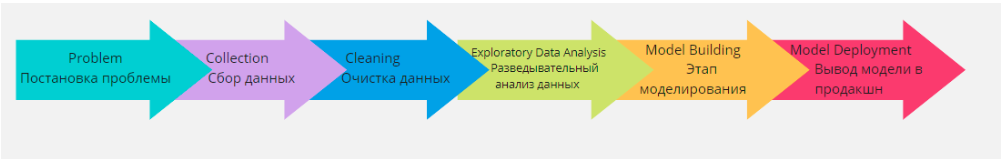

***Например,*** *вы хотите сделать анализ спроса людей на определённое лекарство. Вы собираете данные о клиентах и информацию о том, купил ли конкретный клиент лекарство. Затем вы анализируете доступные данные, создаёте и обучаете модель машинного обучения, потом используете готовую модель на новых данных такого же формата, что и предыдущие.*

Этот процесс предполагает, что обученная модель должна быть конечным результатом проекта машинного обучения. Однако такой подход ошибочен по нескольким причинам.

Мир постоянно развивается, стимулируемый прорывными технологиями, что приводит к постоянному увеличению объёма данных. Следовательно, данные, которые инженеры машинного обучения должны обрабатывать для обучения моделей, также постоянно меняются. Обученная модель может удовлетворить непосредственные потребности заказчика только на основе данных, которые ей были предоставлены, но в долгосрочной перспективе она может оказаться неэффективной, поскольку она не приспосабливается автоматически к изменениям в наборах данных. 

***Например,*** *если вы хотите использовать готовую модель анализа спроса на лекарства, которая была обучена на данных покупателей (регион проживания, цвет глаз, возраст), но о новых покупателях нет возможности собрать подобные данные (в анкетах больше не указывались цвет глаз и регион проживания)*

Обновления в фиксированных наборах данных, используемых для обучения, приводят к изменениям в модели, что снижает её точность. В примере выше столбцы регион и цвет глаз будут иметь пропуски для новых клиентов, а следовательно, прогноз модели, который является суммой признаков, умноженных на обученные коэффициенты, не будет достоверным.

Это особенно важно для проектов в сфере здравоохранения. Чем выше точность показывает модель при классификации медицинских изображений, тем выше шансы, что она сможет соперничать с профессиональными медиками в постановке точных диагнозов, исключая риск человеческой ошибки.

**Точность модели (accuracy)** машинного обучения определяется как процент правильных прогнозов для тестовых данных и рассчитывается путём деления количества правильных прогнозов на общее количество прогнозов. Обычно это определяющий фактор при оценке успеха проекта машинного обучения — чем выше точность, тем лучше работает модель машинного обучения.

Например, вы оцениваете спрос на товар. Ваша цель — узнать, купит ли клиент продукт. Вы строите модель на основе данных и реальных ответов, а затем сравниваете свои предсказания и реальные ответы. Если предсказания совпадают с реальными ответами чаще, чем в 90 % случаях, то обычно говорят, что модель надёжна, и её можно использовать для предсказаний спроса уже других клиентов.

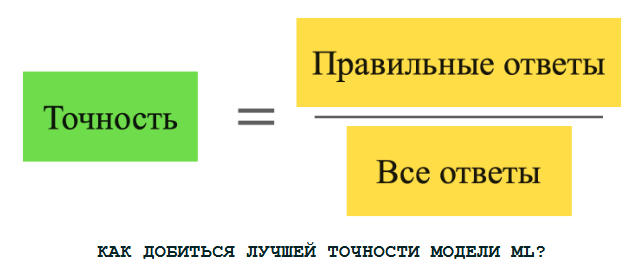

Чтобы оптимизировать метрики для тестовых данных, необходимо пространство для многочисленных экспериментов. Экспериментирование с различными архитектурами моделей, кодом предварительной обработки и параметрами модели, определяющими успех процесса обучения, несколько раз приводит к повторному обучению модели. Всё это вы будете изучать в будущих модулях, посвящённых моделированию в ML.

Возникает необходимость отслеживания экспериментов, то есть сохранения всей важной информации, связанной с каждым запускаемым экспериментом, например сохранение параметров запуска, влияющих на производительность модели. Выполнять эту задачу вручную обременительно, поэтому имеет смысл поставить для процесса автоматизированную инфраструктуру — пайплайн (pipeline) машинного обучения.

**Пайплайном (pipeline)** в ML называется способ систематизации и автоматизации рабочего процесса, необходимого для создания модели машинного обучения. Пайплайны состоят из нескольких последовательных шагов, которые выполняют всё — от извлечения и предварительной обработки данных до обучения и проверки моделей.

Пайплайн машинного обучения состоит из следующих шагов:

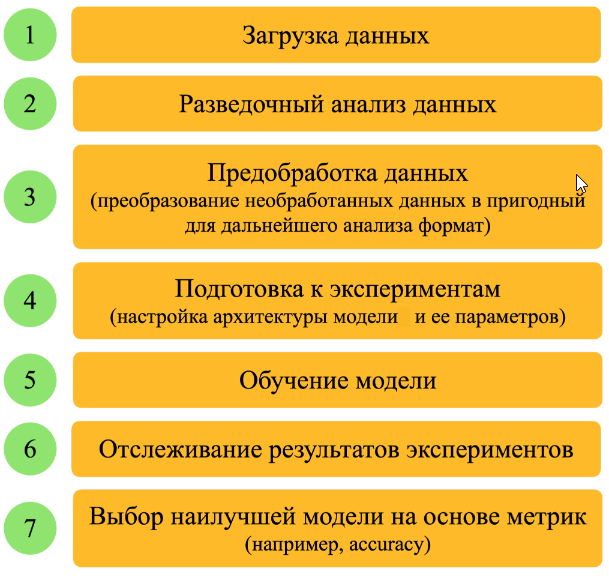

*Этот рабочий процесс позволяет осуществлять* ***непрерывную настройку существующих моделей наряду с постоянной оценкой производительности.*** *Самым большим преимуществом этого процесса является то, что его можно автоматизировать с помощью доступных инструментов.*

Для медицинских стартапов это означает, что они могут получить модель машинного обучения для конкретного проекта, которая будет постоянно обновляться по мере поступления новых данных о пациентах, что приведёт к более высокой точности полученных результатов.

Давайте на примере подробно разберём проектирование экспериментов и построение пайплайна.

Представьте, что вы специалист по данным, а ваша компания сотрудничает с медицинскими учреждениями. Перед вами стоит задача выяснить, почему люди, получившие инструкции по лечению, не приходят на следующий приём. В качестве набора данных вы используете информацию о посещениях и характеристики пациентов.

Каждая история болезни характеризуется следующими признаками:

- **No_show** — пациент не пришёл на приём;
- **Gender** — пол пациента;
- **ScheduledDay** — день, когда планируется встреча;
- **AppointmentDay** — реальная дата встречи;
- **Age** — возраст пациента;
- **Neighbourhood** — район проживания каждого пациента;
- **Scholarship** — получает ли пациент стипендию;
…и несколько других признаков.


In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels import stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce 
import plotly
import plotly.express as px

### 1. Первым этапом данных является загрузка данных: 

In [9]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')
display(df)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


Что делать, если не получается загрузить данные с Kaggle?

Основная цель проекта — выделить факторы, способствующие пропуску встреч с врачом. Однако это долгосрочная цель. Прежде чем копнуть глубже, необходимо попытаться ответить на следующие вопросы:

- Каково соотношение людей, которые пропускают встречи, к тем, кто этого не делает?
- Кто не появляется чаще — мужчины или женщины?

### 2. Для ответа на эти и другие подобные вопросы используется EDA.

Найти соотношение людей, которые пропускают приёмы, к тем, кто этого не делает, можно с помощью гистограммы:

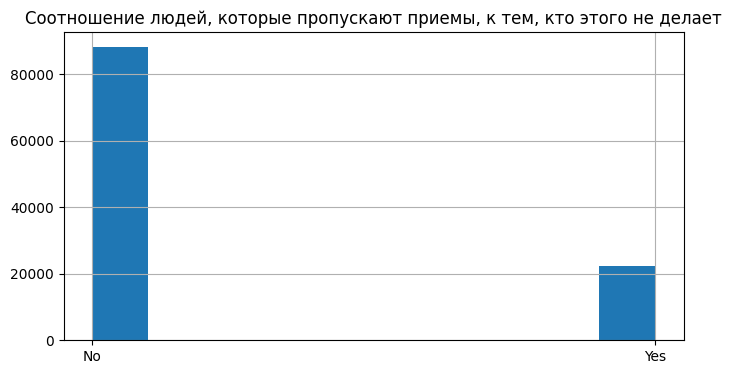

In [10]:

plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

Или, если мы хотим получить точную пропорцию, — с помощью метода value_counts():

In [17]:
df['No-show'].value_counts(True)

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

Данный метод также может помочь оценить, кто не появляется чаще — мужчины или женщины:

In [18]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

Итак, мы видим, что людей, пропускающих приём, примерно 20 %.

### 3. После того, как выполнен разведывательный анализ данных, переходим к предобработке данных. Некоторые столбцы, например ‘Gender’ и ‘Neighbourhood’, представлены в текстовом виде, а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. Для one-hot кодировки можно воспользоваться методом get_dummies() библиотеки pandas:

In [20]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
110523,3.596266e+12,5650093,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
110524,1.557663e+13,5630692,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
110525,9.213493e+13,5630323,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


**Обработка пропусков данных**

In [21]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### 4. После этих этапов можно переходить к созданию предсказания, придёт ли пациент на приём, обучению и оптимизации модели, а также выделению наиболее важных признаков, способствующих высокой производительности модели. Об этом вы узнаете в будущих модулях!

Предположим, вы несколько раз обучили модель с разными параметрами, подобрали наилучшие и достигли . То есть доля верных предсказаний превышает 90 %. Также вы узнали, что наибольший вклад в модель вносят такие признаки, как пол, регион и факт наличия стипендии. Про влияние пола на результат вы догадались во время проведения EDA, регион кажется тоже понятным фактором: люди в крупных городах больше склонны приходить на последующий назначенный прием, а вот факт наличия стипендии — не такой очевидный фактор. 

Это подтверждает тезис о том, что модели машинного обучения могут рассматриваться как чёрный ящик: нечто, куда мы кладём свои данные и получаем предсказание. Не всегда результаты прогнозов легко интерпретируемы. Обычно существует трэйд-офф между качеством модели и её интерпретируемостью: чем сложнее модель, тем выше, но менее очевиден её результат.

Как мы уже выяснили, в реальных проектах может понадобиться не один эксперимент для улучшения производительности модели. Появляется необходимость сохранения всей важной информации, связанной с каждым запускаемым экспериментом. Как сохранять такую информацию, вы узнаете в следующем юните.

### Задание 2.1

Задача
Расставьте в правильном порядке этапы построения проекта в ML.

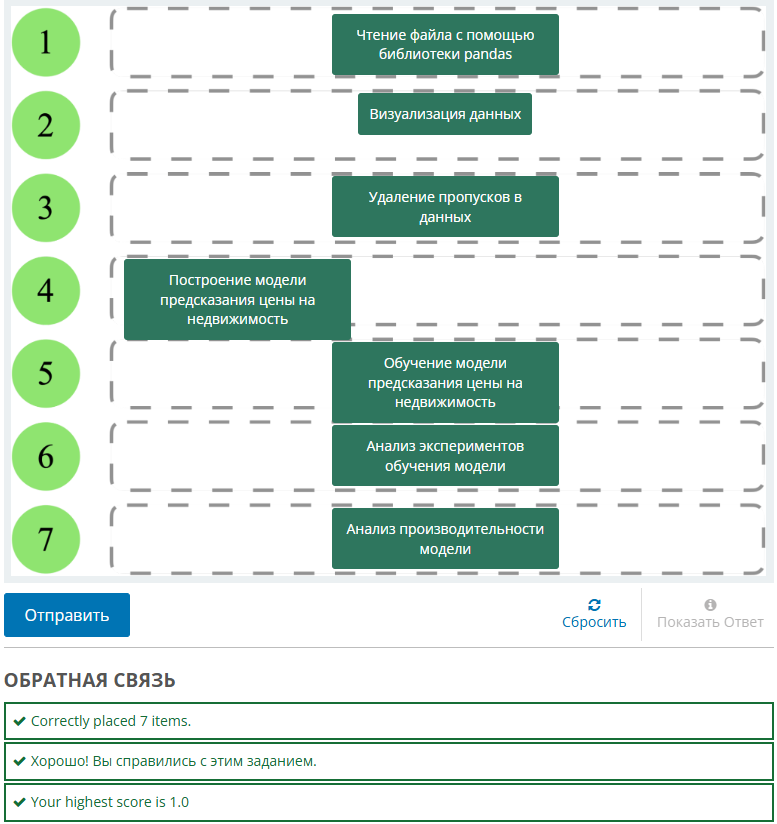

### Задание 2.2

Модель сделала следующие предсказания:

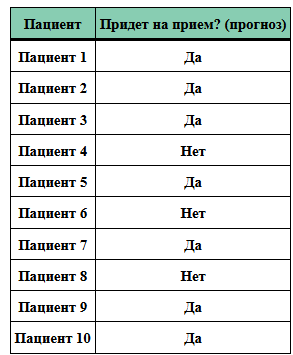

При этом реальные значения целевой переменной были следующие:

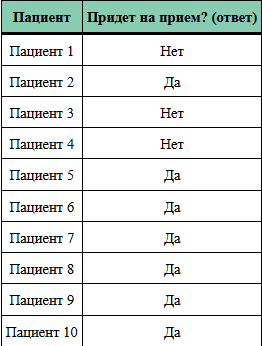

Оцените точность предсказания модели. Ответ запишите в виде десятичной дроби с одним знаком после запятой.

**Ответ**

**Всего 10 ответов из них привильных 6 - итого точность предсказания модели 60% (0.6)**